In [1]:
# Importing all the useful libraries 

import numpy as np # For numeric computation
import cv2 # For imager related works (Computer Vision)
import matplotlib.pyplot as plt # For ploting
import os # For file and folder related tasks
import shutil # For file and folder related tasks


import warnings # To remove unneccesary warning messages

warnings.filterwarnings('ignore')

In [2]:
# For detecting eyes and faces lets use cv2's xml files using CascadeClassifier

# A classifier to detect face
face_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')

# A classifier to detect eye
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

In [2]:
# A helper function that will enable us to detect the face and eye of a given clear image

def show_face_and_eyes(faces,image,gray_image):
    
    cv2.destroyAllWindows()
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


    plt.figure()
    plt.imshow(face_img, cmap='gray')
    plt.show()

# A function that will return us a cropped image if there is clear 2 eyes in our image

def get_cropped_img_if_2_eyes(image_path):
    
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:
            return roi_color

In [4]:
# Lets check the images in the messi folder

os.listdir('../data/player_images/lionel_messi/')

['l_20.jpg',
 'l_57.jpg',
 'l_28.jpg',
 'l_44.jpg',
 'l_52.jpg',
 'l_27.jfif',
 'l_7.jpg',
 'l_54.jpg',
 'l_36.jpg',
 'l_59.jpeg',
 'l_2.jpg',
 'l_17.jpg',
 'l_41.jpg',
 'l_55.jpg',
 'l_67.jfif',
 'l_13.jpg',
 'l_29.jpg',
 'l_40.jpg',
 'l_18.jpg',
 'l_58.jpg',
 'l_56.jpg',
 'l_70.jpg',
 'l_12.jpg',
 'l_43.jpg',
 'l_3.jfif',
 'l_45.jfif',
 'l_32.jpg',
 'l_48.jpg',
 'l_53.jpg',
 'l_15.jpeg',
 'l_71.jpg',
 'l_63.jpg',
 'l_60.jpg',
 'l_10.jpg',
 'l_23.jfif',
 'l_72.jpg',
 'l_26.jpg',
 'l_6.jpg',
 'l_75.jpg',
 'l_31.jfif',
 'cropped',
 'l_8.jpg',
 'l_35.jpg',
 'l_33.jpg',
 'l_69.jpg',
 'l_62.jpg',
 'l_25.jfif',
 'l_51.jpg',
 'l_65.jpg',
 'l_34.jpg',
 'l_73.jpg',
 'l_50.png',
 'l_5.jpg',
 'l_37.jpg',
 'l_38.jpeg',
 'l_66.jpg',
 'l_19.jfif',
 'l_24.jpg',
 'l_61.jpg',
 'l_68.jpg',
 'l_30.jpg',
 'l_22.jpg',
 'l_39.jpg',
 'l_46.jpg',
 'l_16.png',
 'l_74.jpeg',
 'l_1.jpg',
 'l_49.jpg',
 'l_0.jfif']

In [8]:
# Lets specify paths for our images and also create a computer vision (cv) instances

messi_img_path = '../data/player_images/lionel_messi/l_16.png'
ronaldo_img_path = '../data/player_images/cristiano_ronaldo/c_228.jpg'
ronaldo_img_path_no_clear_face = '../data/player_images/cristiano_ronaldo/c_234.jpg'
messi = cv2.imread(messi_img_path)
ronaldo = cv2.imread(ronaldo_img_path)

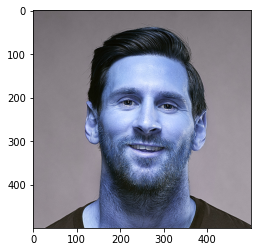

In [9]:
# Plotting messi's image

plt.imshow(messi)

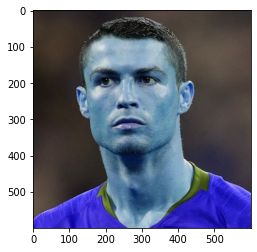

In [10]:
# Plotting Ronaldo's image

plt.imshow(ronaldo)

In [11]:
# Lets create a gray scale image instance for both Messi and Ronaldo

messi_gray = cv2.cvtColor(messi,cv2.COLOR_BGR2GRAY)
ronaldo_gray = cv2.cvtColor(ronaldo,cv2.COLOR_BGR2GRAY)

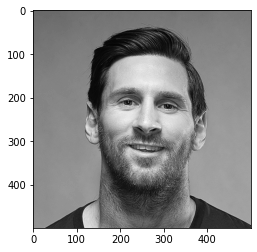

In [12]:
# Lets see Messi's gray scale image

plt.imshow(messi_gray,cmap='gray')

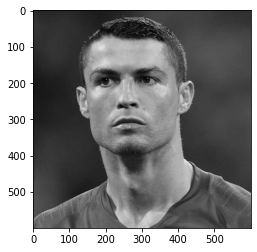

In [13]:
# This is Ronaldo's gray scale image

plt.imshow(ronaldo_gray,cmap='gray')

In [15]:
# Lets detect Messi's and Ronaldo's face using cascaded classifier that we specified above

messi_face = face_cascade.detectMultiScale(messi_gray, 1.3, 5)
ronaldo_face = face_cascade.detectMultiScale(ronaldo_gray, 1.3, 5)

In [16]:
# Our face cascade will return us 4 number x,y,w,h
# x - horizontal axis point
# y- vertical axis face starting point
# w - face width
# h -  face height

x_m,y_m,w_m,h_m = messi_face[0]
x_r,y_r,w_r,h_r = ronaldo_face[0]

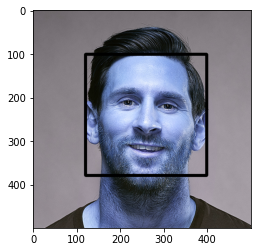

In [17]:
# Lets draw a rectangle with color black and tha above x,y,w,h co-ordinates on Messi's face

messi_face_img = cv2.rectangle(messi,(x_m,y_m),(x_m+w_m,y_m+h_m),(0,0,0),5)
plt.imshow(messi_face_img)

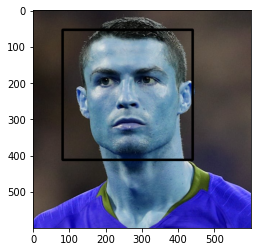

In [18]:
# Lets draw a rectangle with color black and tha above x,y,w,h co-ordinates on Ronaldo's face

ronaldo_face_img = cv2.rectangle(ronaldo,(x_r,y_r),(x_r + w_r,y_r + h_r),(0,0,0),5)
plt.imshow(ronaldo_face_img)

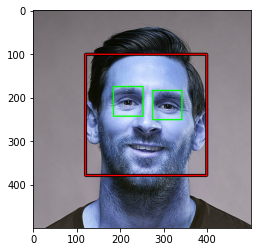

In [19]:
# Lets detect Messi's eye given the gray scaled image of Messi

show_face_and_eyes(messi_face,messi,messi_gray)

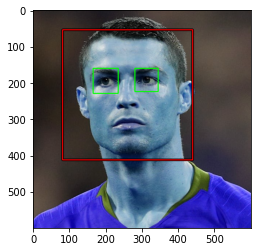

In [20]:
# Lets detect Ronaldo's eye given the gray scaled image of Ronaldo

show_face_and_eyes(ronaldo_face,ronaldo,ronaldo_gray)

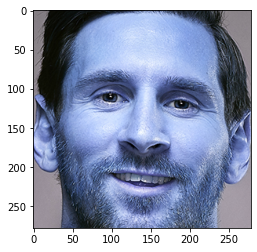

In [21]:
# Now since we have clear 2 eye picture lets try to crop our image of Messi

cropped_image = get_cropped_img_if_2_eyes(messi_img_path)
plt.imshow(cropped_image)

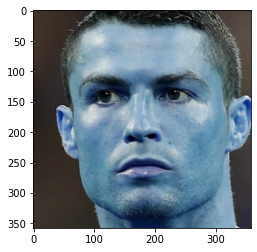

In [22]:
# Now since we have clear 2 eye picture lets try to crop our image of Ronaldo

cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path)
plt.imshow(cropped_image)

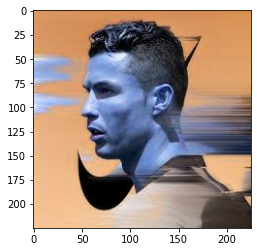

In [23]:
# Lets see as an example image of Ronaldo with no clear 2 eyes picture

not_clear_image = cv2.imread(ronaldo_img_path_no_clear_face)
plt.imshow(not_clear_image)

In [24]:
# Here our cropped image will return None since the image has no clear two eyes

cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path_no_clear_face)
cropped_image

In [25]:
# But here since we supplied clear two eyes having image it will return a numpy array 

cropped_image = get_cropped_img_if_2_eyes(ronaldo_img_path)
cropped_image

array([[[65, 53, 43],
        [65, 53, 43],
        [64, 52, 42],
        ...,
        [82, 71, 63],
        [82, 71, 63],
        [83, 72, 64]],

       [[65, 53, 43],
        [65, 53, 43],
        [64, 52, 42],
        ...,
        [82, 71, 63],
        [82, 71, 63],
        [83, 72, 64]],

       [[64, 52, 42],
        [63, 51, 41],
        [62, 50, 40],
        ...,
        [82, 71, 63],
        [81, 70, 62],
        [81, 70, 62]],

       ...,

       [[60, 51, 48],
        [60, 51, 48],
        [60, 51, 48],
        ...,
        [45, 41, 60],
        [44, 40, 59],
        [46, 42, 61]],

       [[60, 51, 48],
        [60, 51, 48],
        [60, 51, 48],
        ...,
        [44, 40, 59],
        [44, 40, 59],
        [45, 41, 60]],

       [[60, 51, 48],
        [60, 51, 48],
        [60, 51, 48],
        ...,
        [45, 41, 60],
        [44, 40, 59],
        [45, 41, 60]]], dtype=uint8)

In [26]:
# Specifying the path for our images
path = '../data/player_images/'

# Finding out all the player image containing directories
image_dirs = os.listdir('../data/player_images')

In [28]:
# Creating a cropped image directory to contain all the clear and cropped images

for img_dir in image_dirs:
    dir_path = path + img_dir + '/cropped'
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

In [29]:
'''

Lets itterate through all the images in our players directory and
see if the image is clear, if so we check if it contains two eyes
then we will crop the image and save it in the cropped images folder.


'''
for img_dir in image_dirs:
    
    dir_path = path + img_dir
    
    i = 0
    
    for file in os.listdir(dir_path):

        if file != 'cropped':
            
            
            cropped_image = get_cropped_img_if_2_eyes(dir_path + '/' + file)
            
            if cropped_image is not None:
                
                    cropped_file_name = img_dir + '_' + str(i) + '.png'
                    cropped_file_path = dir_path + '/cropped/' + cropped_file_name  
                    
                    try:
                        cv2.imwrite(cropped_file_path,cropped_image)
                    except:
                        print(file)
                    
                    i+=1


    print(f'Got {i} useful images for {img_dir}')

libpng warning: iCCP: known incorrect sRGB profile


Got 42 useful images for ronaldinho
Got 46 useful images for lionel_messi
Got 19 useful images for patrick_vieira
Got 31 useful images for thierry_henry
Got 93 useful images for cristiano_ronaldo


<h2> Lets see cropped images of Henry and delete all those files that don't represent the player </h2>

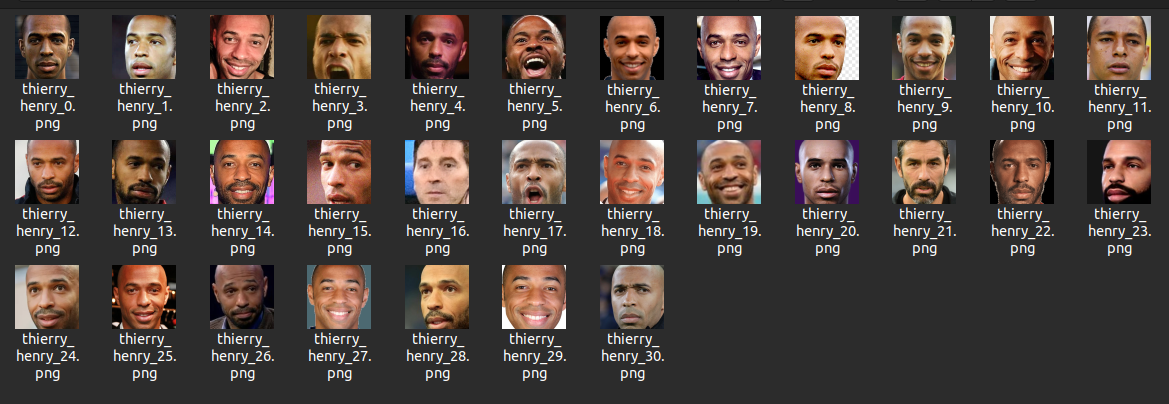

> We can see that the 5th,11th,16nd and 21st are not representing Henry so let remove them

In [30]:
# Removing images that are not Henry

remove_idx = [5,11,16,21]
path = '../data/player_images/thierry_henry'
for id in remove_idx:
    os.remove(path+'/cropped/thierry_henry_' + str(id) + '.png')

<h2> After removing those now we got these images </h2>

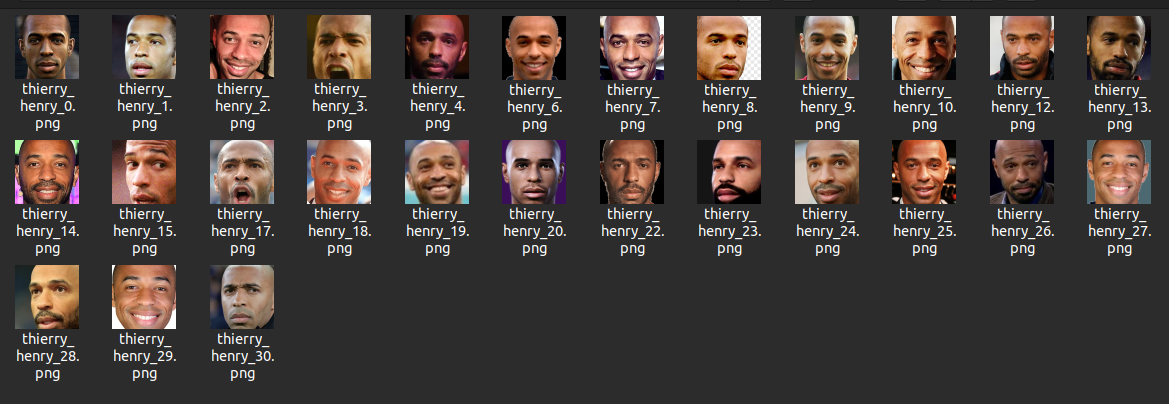

<h2>For Ronaldinho we can see that only the _26.png is not representing him so lets remove that</h2>

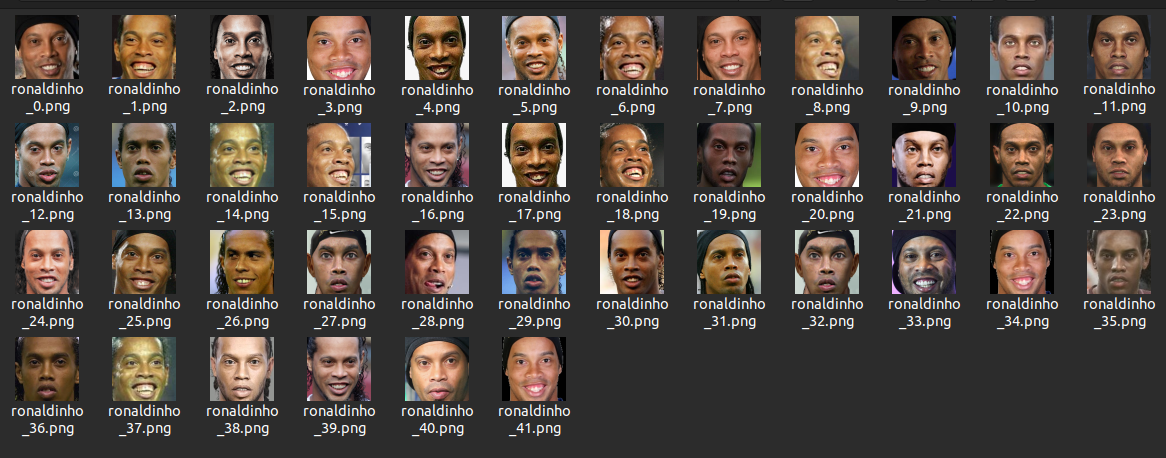

In [31]:
# Removing the image that doesn't represent Ronaldinho

remove_idx = [26]
path = '../data/player_images/ronaldinho'
for id in remove_idx:
    os.remove(path+'/cropped/ronaldinho_' + str(id) + '.png')

<h2> After removing now we got these images </h2>

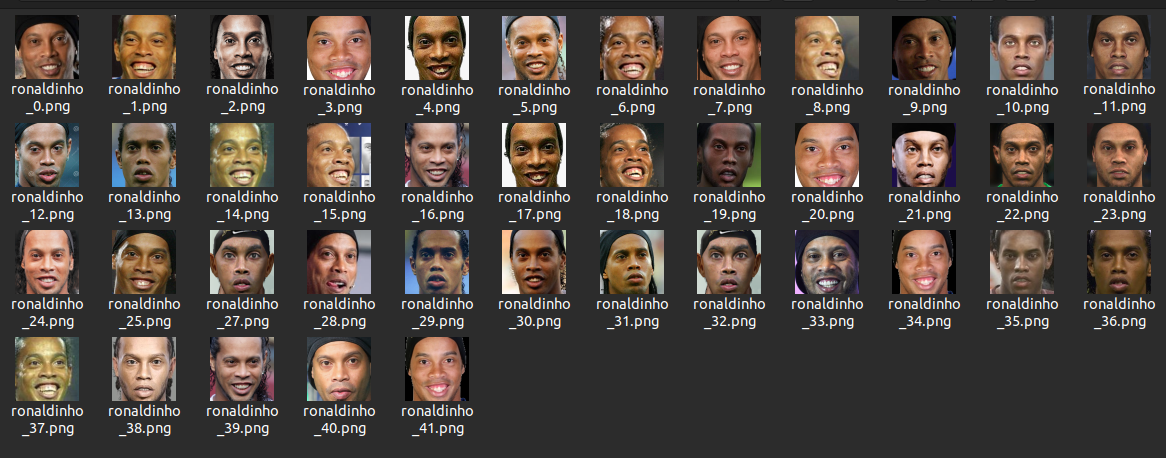

<h2> Lets see for Vieira images, we can clearly see that _5th and _19th is not him so lets remove them </h2>

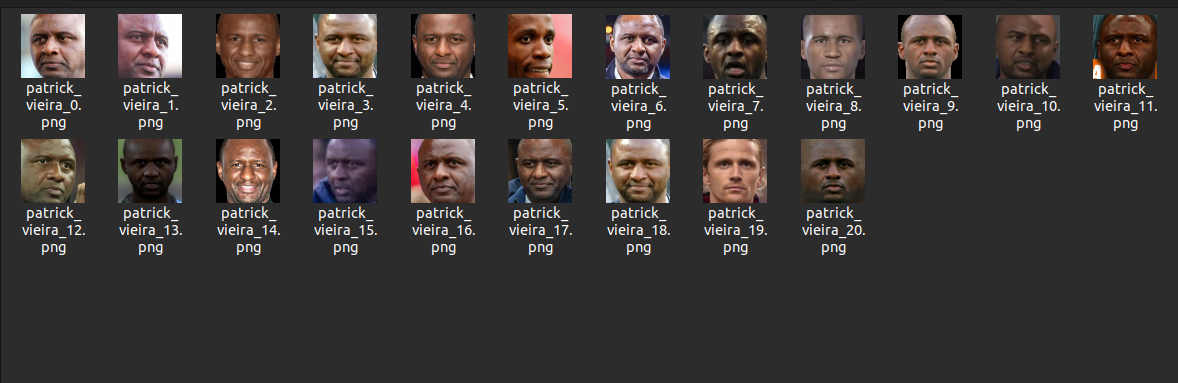

<h2>Now we got these images</h2>

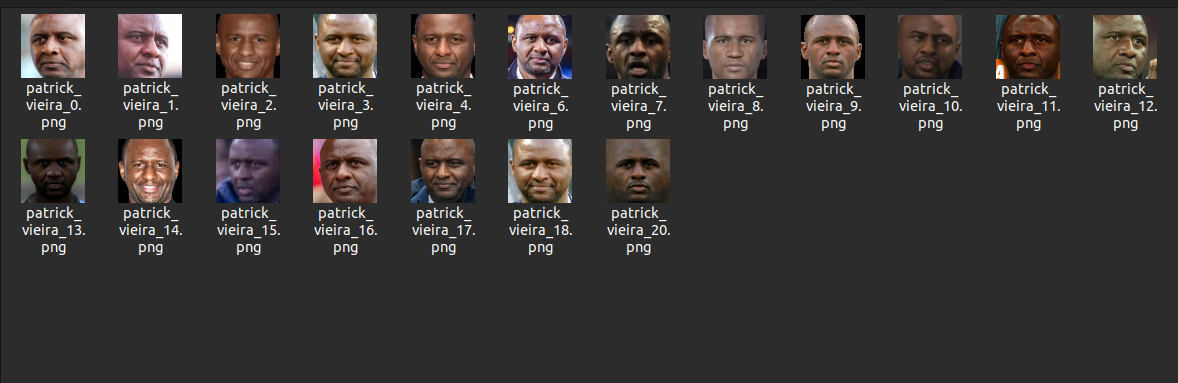

<h2>On the Messi image we can see that on the _1st Ronaldo is invading :) lets remove him :) and also his wife and child are disturbing at _13,_23,_34 lets remove them</h2>

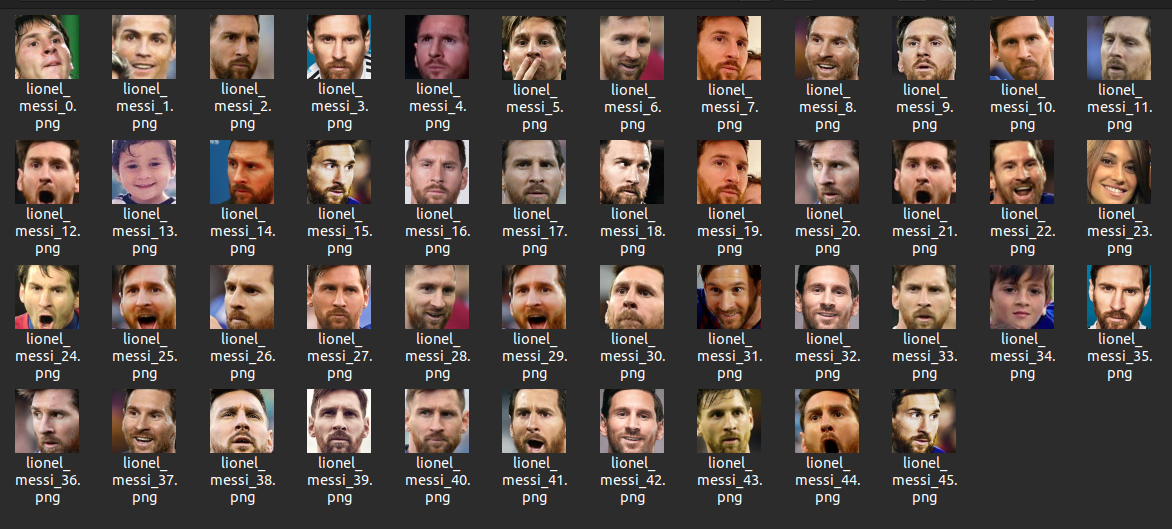

In [33]:
# Removing the image that doesn't represent Messi

remove_idx = [1,13,23,34]
path = '../data/player_images/lionel_messi'
for id in remove_idx:
    os.remove(path+'/cropped/lionel_messi_' + str(id) + '.png')

<h2>Now Messi is alone :):):)</h2>

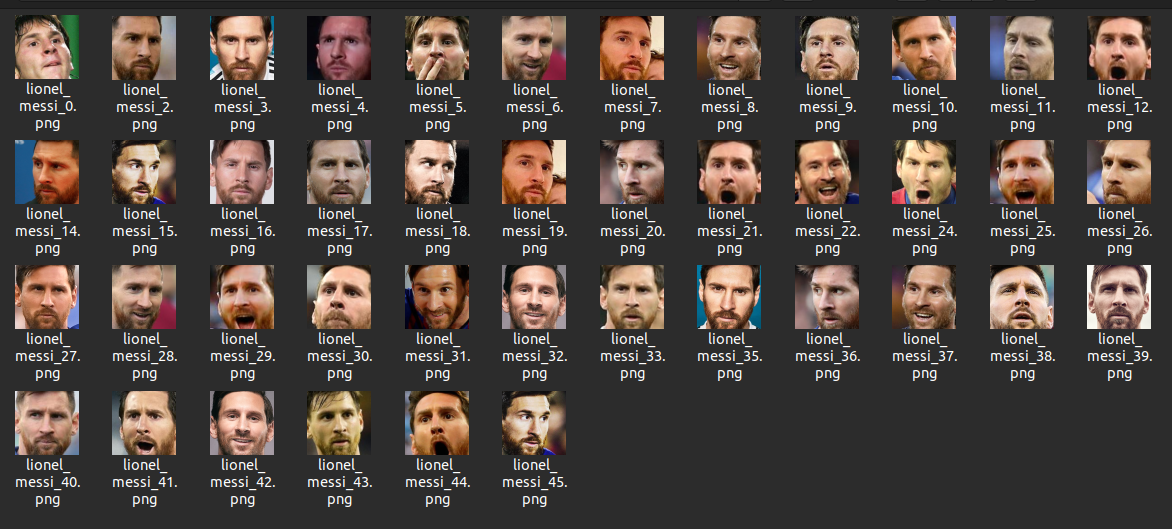

<h2>There are some other photos on Ronaldo folder lets remove them</h2>

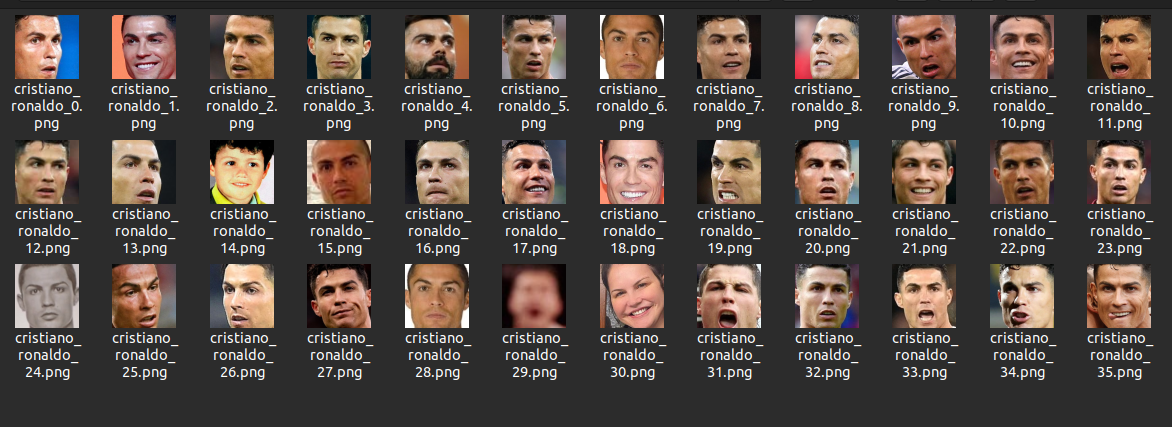

In [34]:
# Removing the images that are not representing CR7

remove_idx = [4,14,29,30]
path = '../data/player_images/cristiano_ronaldo'
for id in remove_idx:
    os.remove(path+'/cropped/cristiano_ronaldo_' + str(id) + '.png')

<h2>After removing we got these photots</h2>

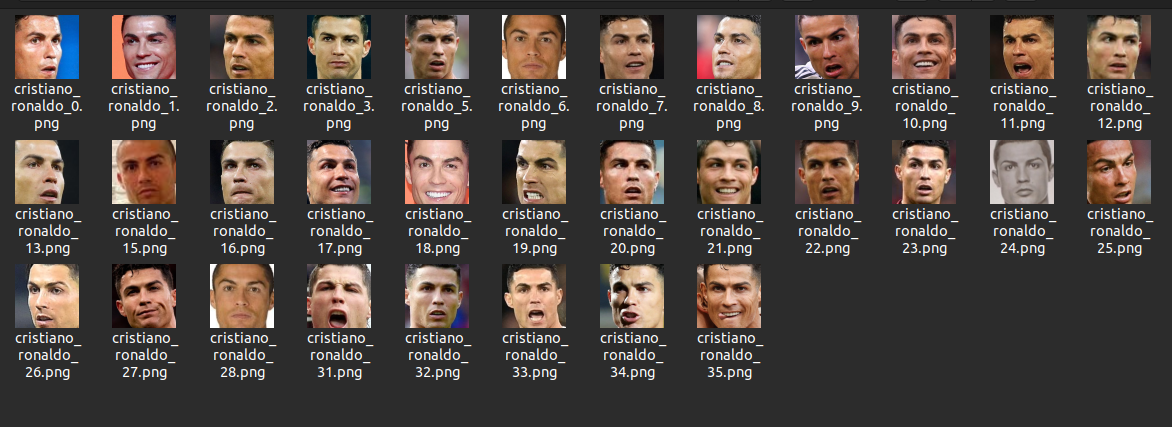

<h1>I didn't push the data folder since it is more than 100MB but this is how the folder structure looks like</h1>

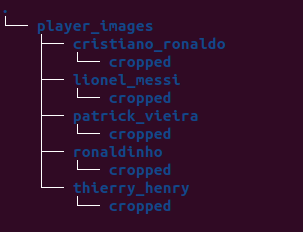